In [6]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

In [7]:
df_labeled = pd.read_parquet('../../data/processed/ds_labeled.parquet')

In [8]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   id_prenotazione                     460509 non-null  object             
 1   id_paziente                         460509 non-null  object             
 2   data_nascita                        460509 non-null  datetime64[ns, UTC]
 3   sesso                               460509 non-null  object             
 4   regione_residenza                   460509 non-null  object             
 5   tipologia_servizio                  460509 non-null  object             
 6   descrizione_attivita                460509 non-null  object             
 7   data_contatto                       460509 non-null  object             
 8   tipologia_struttura_erogazione      460509 non-null  object             
 9   id_professionista_sanitari

In [9]:
cols_to_drop = df_labeled.columns[[0,1,2,3,5,6,7,9,11,12,14,15]]
df = df_labeled.drop(columns=cols_to_drop)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   regione_residenza                   460509 non-null  object
 1   tipologia_struttura_erogazione      460509 non-null  object
 2   tipologia_professionista_sanitario  460509 non-null  object
 3   fascia_eta                          460509 non-null  object
 4   incremento_teleassistenze           460509 non-null  object
dtypes: object(5)
memory usage: 17.6+ MB


## Elbow Method

L'Elbow Method consiste nel:

1. Eseguire K-Prototypes per una gamma di valori di 
𝑘 (ad esempio, da 1 a 10).
2. Calcolare il "Costo" (o l'inertia): La funzione di costo (inertia) misura la somma delle distanze tra i punti dati e i loro rispettivi centroidi.
3. Tracciare il Costo: Tracciare il costo rispetto ai diversi valori di 
𝑘.
4. Identificare l'Elbow (gomito): Il punto in cui il tasso di riduzione della funzione di costo inizia a diminuire significativamente. Questo punto rappresenta il numero ottimale di cluster.

In [11]:
#X = df.to_numpy()

In [12]:
categorical_columns = [0,1,2,3,4]

In [13]:
cost = []
K = range(1, 13) # Range di valori per k (numero di cluster)

In [14]:
for numero_cluster in K:
    kmodes = KModes(n_clusters=numero_cluster, init='Huang', n_init=5, verbose=1)
    kmodes.fit_predict(df)
    cost.append(kmodes.cost_) # Calcolo del costo

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1400832.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1400832.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1400832.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1400832.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1400832.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 135993, cost: 1211968.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 62817, cost: 1266384.0
Init: initializing centroids
Init: initializing clus

In [15]:
# for numero_cluster in K:
#     kproto = KPrototypes(n_clusters=numero_cluster, init='Huang', n_init = 3 , verbose=1)
#     kproto.fit_predict(df, categorical = categorical_columns)
#     cost.append(kproto.cost_)

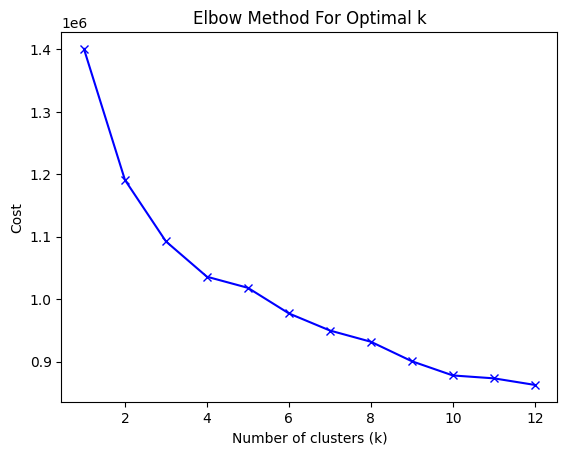

In [16]:
# Grafica il costo per ogni k
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('../../data/graph/elbow_method.png')
plt.show()

In [43]:
kmodes = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

In [44]:
clusters = kmodes.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 89919, cost: 1112544.0
Run 1, iteration: 2/100, moves: 13283, cost: 1112544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 81422, cost: 1051082.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 35978, cost: 1086668.0
Run 3, iteration: 2/100, moves: 13400, cost: 1086668.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 158481, cost: 1083087.0
Run 4, iteration: 2/100, moves: 2718, cost: 1083087.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 127357, cost: 1074711.0
Best run was number 2


## KPrototypes



- n_clusters=3`: Questo è il numero di cluster che l'algoritmo cercherà di identificare nei tuoi dati. In questo caso, stai chiedendo all'algoritmo di trovare 3 cluster.
- init='Huang'`: Questo è il metodo di inizializzazione che l'algoritmo utilizzerà per inizializzare i centroidi. In questo caso, stai utilizzando il metodo di inizializzazione di Huang.
- n_init=5`: Questo è il numero di volte che l'algoritmo verrà eseguito con diverse inizializzazioni dei centroidi. L'algoritmo restituirà il modello con la migliore inizializzazione.
- verbose=1`: Questo è il livello di verbosità dell'algoritmo. Più alto è il valore, più informazioni verranno stampate a schermo durante l'esecuzione dell'algoritmo.

In [45]:
# Crea un'istanza dell'algoritmo K-Prototype
# kproto = KPrototypes(n_clusters=6, init='Huang', n_init=5, verbose=1)


In [46]:
# Adatta l'algoritmo ai dati
# Devi specificare le colonne dei dati categorici
# clusters = kproto.fit_predict(df, categorical=[0, 1, 2])  # sostituisci con le tue colonne categoriche

In [47]:
np.unique(clusters) 

array([0, 1, 2, 3], dtype=uint16)

In [48]:
df_labeled['cluster'] = clusters

In [49]:
df_labeled.to_parquet('../../data/processed/clustered_data.parquet')

In [50]:
df_labeled.head()

,id_prenotazione,id_paziente,data_nascita,sesso,regione_residenza,tipologia_servizio,descrizione_attivita,data_contatto,tipologia_struttura_erogazione,id_professionista_sanitario,tipologia_professionista_sanitario,data_erogazione,durata_erogazione_sec,fascia_eta,anno,quadrimestre,incremento_teleassistenze,cluster
0,JUOCPQCUG1H96QO,LCWFXF28X79P382V,1980-04-24 00:00:00+00:00,male,Piemonte,Teleassistenza,Insegnamento al paziente e/o alla sua famiglia...,2019-01-09T11:21:54+01:00,Azienda Ospedaliera,MZRAER00D13A287J,Infermiere,2019-02-04 10:00:00+00:00,2925,36-47,2019,1,medium_increment,2
1,XDP99NXRHPOYFYU,LRFZOI94E58U012I,1972-01-30 00:00:00+00:00,female,Toscana,Teleassistenza,Prestazione infermieristica connessa alla nece...,2019-01-10T11:57:43+01:00,Azienda Ospedaliera Universitaria,EBCRPU12T24U316I,Infermiere,2019-02-01 10:00:00+00:00,1895,48-59,2019,1,high_increment,1
2,6VYI0AK57ECO5WU,JOBCGJ98A04B765H,1986-06-27 00:00:00+00:00,male,Emilia romagna,Teleassistenza,Prestazione dietistica,2019-01-11T07:04:17+01:00,Ospedale a gestione diretta,PMEJNL62M27F357I,Dietista,2019-02-03 06:00:00+00:00,1165,36-47,2019,1,high_increment,1
3,VLFS5J9E3Q74Q2W,TKROSE51Z77Q065E,1967-10-21 00:00:00+00:00,female,Campania,Teleassistenza,Psicoterapia individuale,2019-01-11T07:41:52+01:00,Azienda Ospedaliera,VNNRMQ15C69W200K,Psicologo,2019-02-01 06:00:00+00:00,1969,48-59,2019,1,high_increment,1
4,XD8SZX9JOVCMEXW,WRRVSK73Z45L640S,1963-08-24 00:00:00+00:00,male,Abruzzo,Teleassistenza,Prestazione dietistica,2019-01-11T15:33:29+01:00,Ospedale a gestione diretta,GIQCNR34T04P154U,Dietista,2019-02-05 14:00:00+00:00,3099,60-69,2019,1,high_increment,1


# Calculate Purity

In [51]:
true_labels = df_labeled.incremento_teleassistenze.to_numpy()

In [52]:
true_labels

array(['medium_increment', 'high_increment', 'high_increment', ...,
       'high_increment', 'high_increment', 'high_increment'], dtype=object)

In [53]:
from collections import Counter

In [54]:
def calculate_purity(clusters, true_labels):
    print('Clusters:', clusters)

    N = len(true_labels) # number of data points
    purity_sum = 0

    for cluster_id in np.unique(clusters):
        # Obtain the indices of data points in the cluster
        print(cluster_id)

        cluster_indices = np.where(clusters == cluster_id)[0] # [0] to get the array from the tuple, as np.where returns a tuple
        print('Cluster indices:', cluster_indices)

        # Obtain the true labels of data points in the cluster
        cluster_labels = true_labels[cluster_indices]
        print('Cluster labels', cluster_labels)

        # Count the number of data points in each class
        most_common_label, count = Counter(cluster_labels).most_common(1)[0] # most_common returns a list of tuples, we take the first one
        print(f'Most common label: {most_common_label}, count: {count}')

        purity_sum += count
        print('\n')

    purity = purity_sum / N
    return purity



In [55]:
purity = calculate_purity(clusters, true_labels)
print('Purity is:', purity)

Clusters: [2 1 1 ... 1 1 1]
0
Cluster indices: [     5      6      7 ... 460502 460503 460505]
Cluster labels ['high_increment' 'high_increment' 'high_increment' ...
 'constant_increment' 'low_increment' 'low_increment']
Most common label: low_increment, count: 129488


1
Cluster indices: [     1      2      3 ... 460506 460507 460508]
Cluster labels ['high_increment' 'high_increment' 'high_increment' ... 'high_increment'
 'high_increment' 'high_increment']
Most common label: high_increment, count: 130869


2
Cluster indices: [     0      9     50 ... 460488 460490 460504]
Cluster labels ['medium_increment' 'high_increment' 'medium_increment' ...
 'constant_increment' 'constant_increment' 'constant_increment']
Most common label: low_increment, count: 29831


3
Cluster indices: [    14     34     56 ... 460479 460485 460492]
Cluster labels ['medium_increment' 'medium_increment' 'medium_increment' ...
 'medium_increment' 'medium_increment' 'constant_increment']
Most common label: medium_